# League of Legends Games Analysis

## Overall overview

### Brief context 

League of Legends is a team game where two sides, blue and red, fight to win. Players move through three lanes and a jungle, each playing one of five roles. In the lanes, small minions spawn to help push toward enemy towers, which players must destroy. In the jungle, players fight neutral monsters, including powerful ones like Dragons and the Rift Herald. The main goal is to break the enemy’s Nexus, the main building in their base.

### Dataset Description
- Almost 10k of rows each representing single game
- 38 features columns (19 per team)
- 10 first minuts of ranked games (SoloQ)
- High Elo (D1 - Master)

### Features Description

**blueWardsPlaced**  
Number of warding totems placed on the map by blue team  
*(Numerical – Integer)*

**blueWardsDestroyed**  
Number of enemy totems destroyed by blue team  
*(Numerical – Integer)*

**blueFirstBlood**  
First kill of the game. 1 if the blue team did the first kill, 0 otherwise  
*(Numerical – Integer [0,1])*

**blueKills**  
Number of enemies killed by the blue team  
*(Numerical – Integer)*

**blueAssists**  
Number of kill assists (blue team)  
*(Numerical – Integer)*

**blueEliteMonsters**  
Number of elite monsters killed by the blue team (Dragons and Heralds)  
*(Numerical – Integer)*

**blueDragons**  
Number of dragons killed by the blue team  
*(Numerical – Integer)*

**blueHeralds**  
Number of heralds killed by the blue team  
*(Numerical – Integer)*

**blueTowersDestroyed**  
Number of structures destroyed by the blue team  
*(Numerical – Integer)*

**blueTotalGold**  
Blue team total gold  
*(Numerical – Integer)*

**blueAvgLevel**  
Blue team average champion level  
*(Numerical – Integer)*

**blueTotalExperience**  
Blue team total experience  
*(Numerical – Integer)*

**blueTotalMinionsKilled**  
Blue team totals minions killed (CS)  
*(Numerical – Integer)*

**blueTotalJungleMonstersKilled**  
Blue team total jungle monsters killed  
*(Numerical – Integer)*

**blueGoldDiff**  
Blue team gold difference compared to the enemy team  
*(Numerical – Integer)*

**blueExperienceDiff**  
Blue team experience difference compared to the enemy team  
*(Numerical – Integer)*

**blueCSPerMin**  
Blue team CS (minions) per minute  
*(Numerical – Decimal)*

**blueGoldPerMin**  
Blue team gold per minute  
*(Numerical – Decimal)*


### Goals

**Goal:** Understand which early-game stats (and the related actions) in the first 10 minutes best increase the chance of winning.

**Success Criteria:**
 - We can list early-game actions that help increase the chances of winning.

 - We understand why these actions are important for winning.

 - We can explain how much the final outcome depends on early-game performance.



## Data Structure
As we can see we have only numeric atribbutes, mainly intagers and few floats, also we have removed column gameId as it is only id of the game and it doesn't carry any useful information for analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Grando476/LoLDataMining/refs/heads/main/high_diamond_ranked_10min.csv'

df = pd.read_csv(url)
df = df.drop(columns=['gameId'])
print("Shape of dataset:", df.shape)
df.head()



Shape of dataset: (9879, 39)


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


# Explanatory Data Analysis

## Main Satistics
Calcualtion of main statistics (mean, standard deviation, min/max and quantiles) for all attributes.

In [2]:
pd.set_option('display.precision', 2)
df.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.0,9879.00,9879.00,9879.0,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,...,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00,9879.00
mean,0.5,22.29,2.82,0.5,6.18,6.14,6.65,0.55,0.36,0.19,...,0.04,16489.04,6.93,17961.73,217.35,51.31,-14.41,33.62,21.73,1648.90
std,0.5,18.02,2.17,0.5,3.01,2.93,4.06,0.63,0.48,0.39,...,0.22,1490.89,0.31,1198.58,21.91,10.03,2453.35,1920.37,2.19,149.09
min,0.0,5.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,11212.00,4.80,10465.00,107.00,4.00,-11467.00,-8348.00,10.70,1121.20
25%,0.0,14.00,1.00,0.0,4.00,4.00,4.00,0.00,0.00,0.00,...,0.00,15427.50,6.80,17209.50,203.00,44.00,-1596.00,-1212.00,20.30,1542.75
50%,0.0,16.00,3.00,1.0,6.00,6.00,6.00,0.00,0.00,0.00,...,0.00,16378.00,7.00,17974.00,218.00,51.00,-14.00,28.00,21.80,1637.80
75%,1.0,20.00,4.00,1.0,8.00,8.00,9.00,1.00,1.00,0.00,...,0.00,17418.50,7.20,18764.50,233.00,57.00,1585.50,1290.50,23.30,1741.85
max,1.0,250.00,27.00,1.0,22.00,22.00,29.00,2.00,1.00,1.00,...,2.00,22732.00,8.20,22269.00,289.00,92.00,10830.00,9333.00,28.90,2273.20


## Distribution of attribute values 

As we can see on histograms the data seems to be normally distributed for each of our fetature (excluding the binary or almost binary ones). 

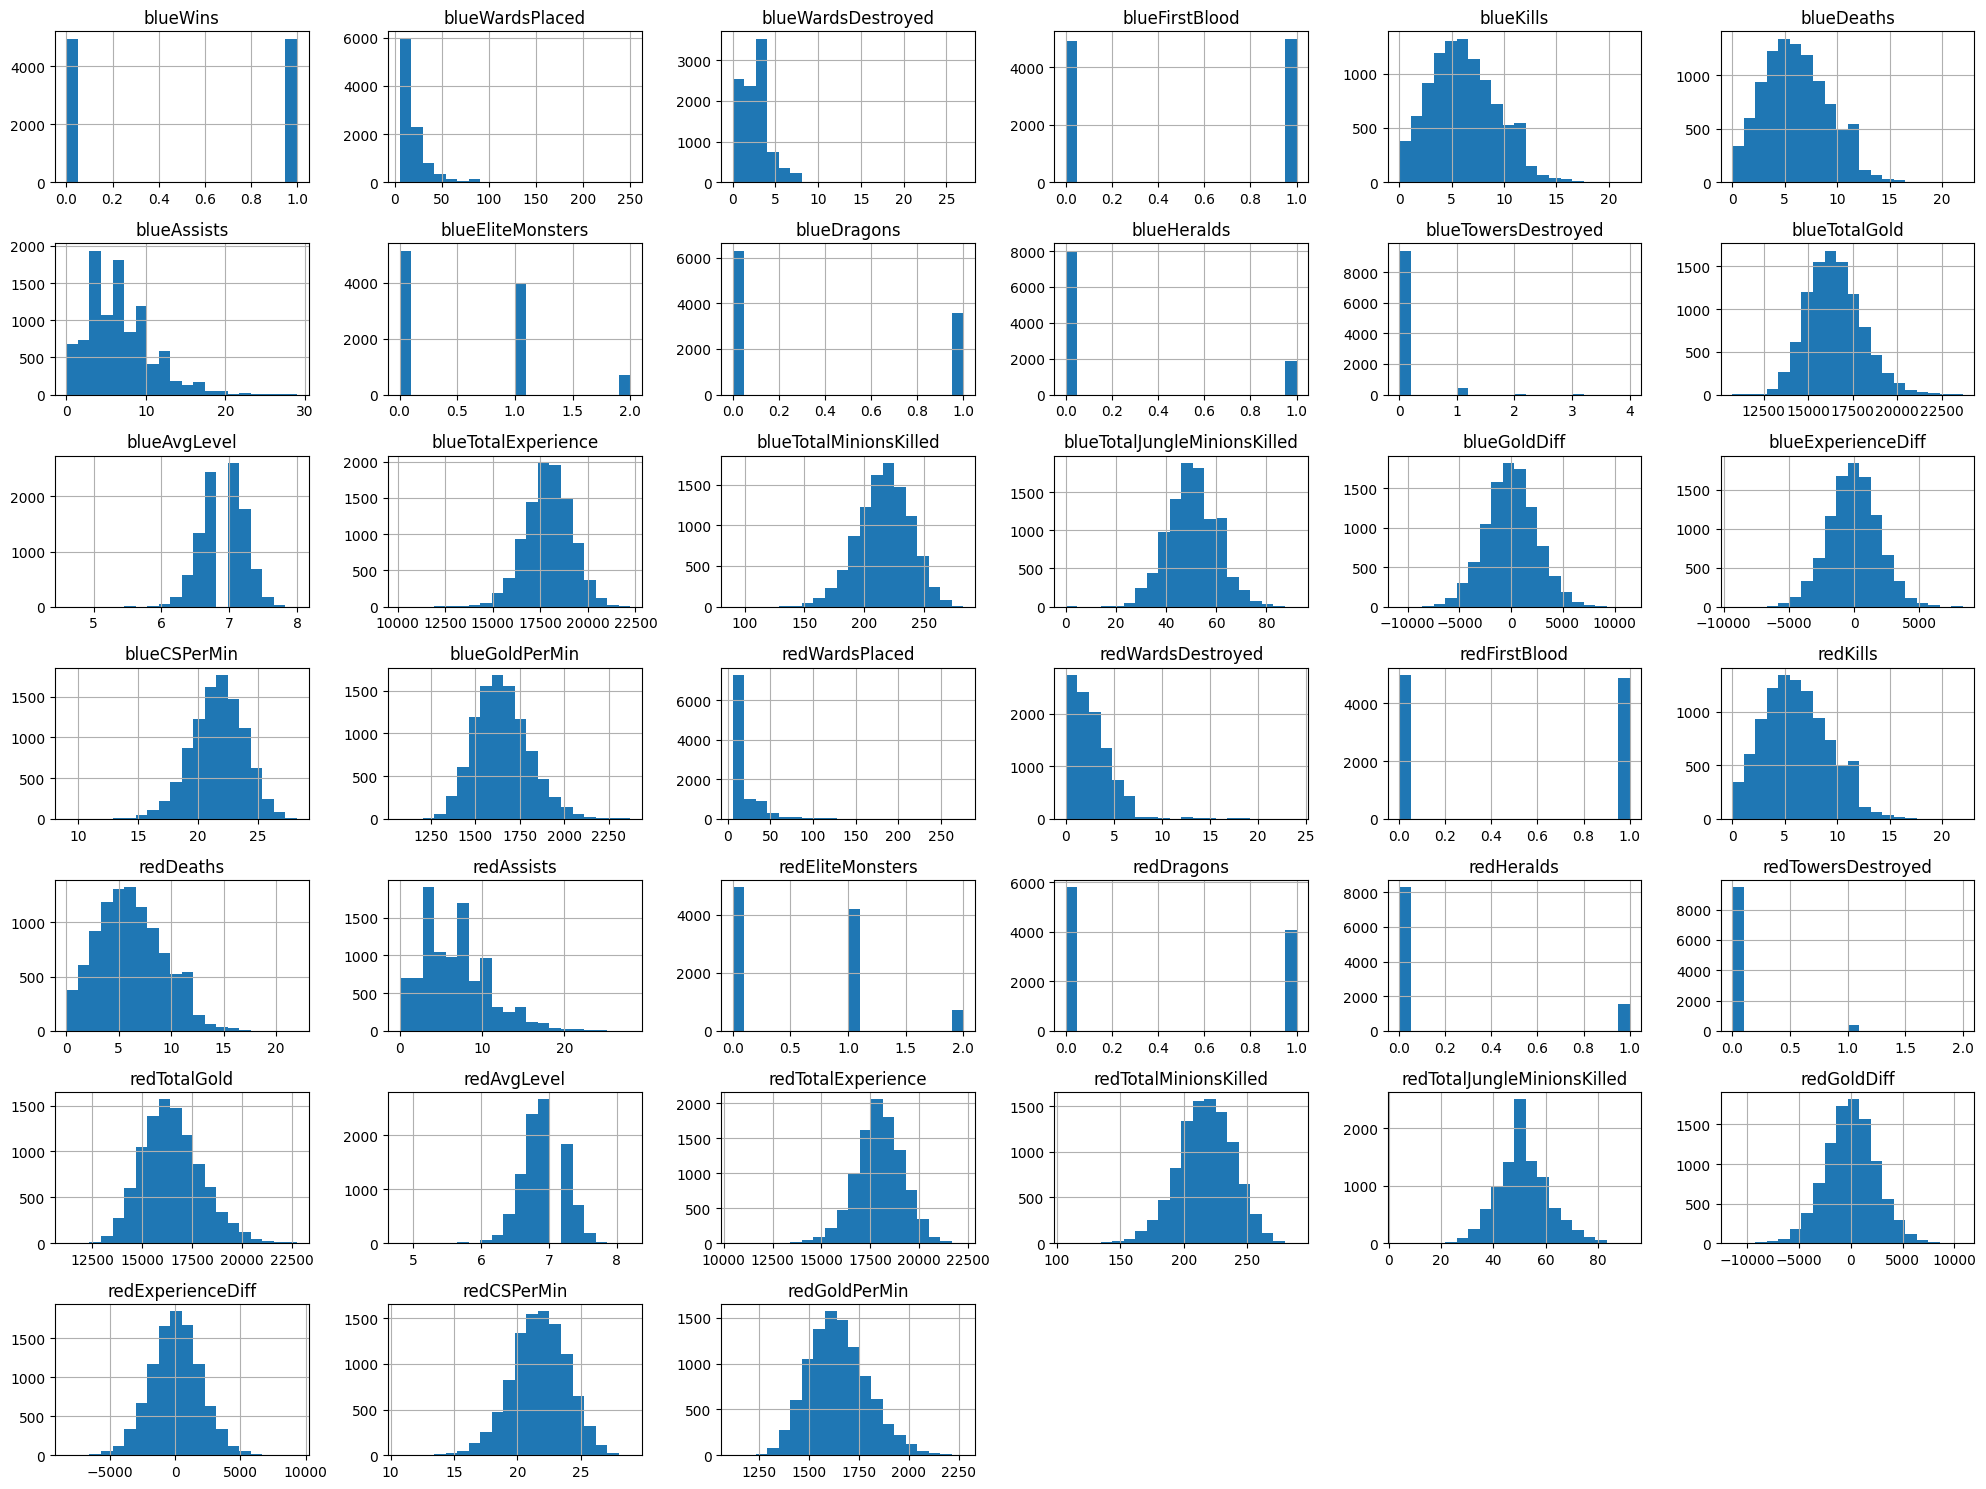

In [3]:
df.describe()

# Ploting histograms
df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

However after checking for normality is seems that non of the them is normally distributed. The cause of it seems to be the fact that all of the data is discreate. 

In [4]:
from scipy.stats import normaltest

# Prepare a DataFrame to store the results
normality_results = []

# Loop through each numeric column
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    stat, p = normaltest(df[column])
    normality = 'Normal' if p > 0.05 else 'Not normal'
    normality_results.append({
        'Feature': column,
        'Chi-squared statistic': stat,
        'p-value': p,
        'Normality': normality
    })

# Create a results DataFrame
normality_df = pd.DataFrame(normality_results)

# Display the results
normality_df.sort_values('p-value')



,Feature,Chi-squared statistic,p-value,Normality
0,blueWins,33987.66,0.00e+00,Not normal
27,redDragons,36959.73,0.00e+00,Not normal
28,redHeralds,2984.90,0.00e+00,Not normal
29,redTowersDestroyed,10139.12,0.00e+00,Not normal
22,redFirstBlood,33995.01,0.00e+00,Not normal
9,blueHeralds,2309.90,0.00e+00,Not normal
8,blueDragons,44939.91,0.00e+00,Not normal
10,blueTowersDestroyed,10649.06,0.00e+00,Not normal
21,redWardsDestroyed,6706.23,0.00e+00,Not normal
3,blueFirstBlood,33995.01,0.00e+00,Not normal


### Transformations

Let's try some transformations to see whether it will help with our normality problems. We will use the logarithmic one. We will only transform those than are not close to being binary.

In [5]:
import numpy as np

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
binary_like_cols = []

for col in numeric_cols:
    unique_vals = df[col].nunique()
    if unique_vals <= 4:  # <=4 means  binary or very close
        binary_like_cols.append(col)


# Keeping only those numeric features which are NOT binary/near-binary
selected_cols_for_transformation = [col for col in numeric_cols if col not in binary_like_cols]

print(selected_cols_for_transformation)

df_log_transformed = df.copy()

for col in selected_cols_for_transformation:
    min_val = df_log_transformed[col].min()
    if min_val <= 0:
        df_log_transformed[col] = np.log1p(df_log_transformed[col] - min_val + 1)
    else:
        df_log_transformed[col] = np.log(df_log_transformed[col])

df_log_transformed.head()




['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths', 'redAssists', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,3.33,1.39,1,2.40,2.08,2.56,0,0,0,...,0,9.72,1.92,9.74,5.28,4.01,9.29,9.03,2.98,7.41
1,0,2.48,1.10,0,1.95,1.95,1.95,0,0,0,...,1,9.78,1.92,9.77,5.48,3.95,9.57,9.16,3.18,7.47
2,0,2.71,0.69,0,2.20,2.56,1.79,1,1,0,...,0,9.76,1.92,9.76,5.31,3.33,9.44,9.15,3.01,7.46
3,0,3.76,1.10,0,1.79,1.95,1.95,1,0,1,...,0,9.71,1.95,9.80,5.46,3.85,9.46,9.03,3.16,7.41
4,0,4.32,1.79,0,2.08,2.08,2.08,0,0,0,...,0,9.76,1.95,9.82,5.42,4.20,9.43,9.00,3.11,7.46


checking normality once again

In [6]:
from scipy.stats import normaltest

# DataFrame to store the results
normality_results = []

# Loop through each selecteed column
for column in selected_cols_for_transformation:
    stat, p = normaltest(df_log_transformed[column])
    normality = 'Normal' if p > 0.05 else 'Not normal'
    normality_results.append({
        'Feature': column,
        'Chi-squared statistic': stat,
        'p-value': p,
        'Normality': normality
    })

normality_df = pd.DataFrame(normality_results)
normality_df.sort_values('p-value')

,Feature,Chi-squared statistic,p-value,Normality
0,blueWardsPlaced,3318.76,0.00e+00,Not normal
25,redGoldDiff,11216.61,0.00e+00,Not normal
15,redWardsPlaced,3313.97,0.00e+00,Not normal
11,blueGoldDiff,10406.65,0.00e+00,Not normal
10,blueTotalJungleMinionsKilled,4660.98,0.00e+00,Not normal
26,redExperienceDiff,10200.02,0.00e+00,Not normal
12,blueExperienceDiff,11559.81,0.00e+00,Not normal
24,redTotalJungleMinionsKilled,2116.82,0.00e+00,Not normal
5,blueTowersDestroyed,9351.94,0.00e+00,Not normal
21,redAvgLevel,1048.96,1.67e-228,Not normal


Unfortunately even after the transformation our data is not normal. As the conclusion we should probably omit any normality needing algorithms and focus on those without this requirement like Decision trees :)

# Distribution of wins
We can se that data is not biased as wins are equally distributed. Red and blue team is mostly balanced and there are only few minor differences. 

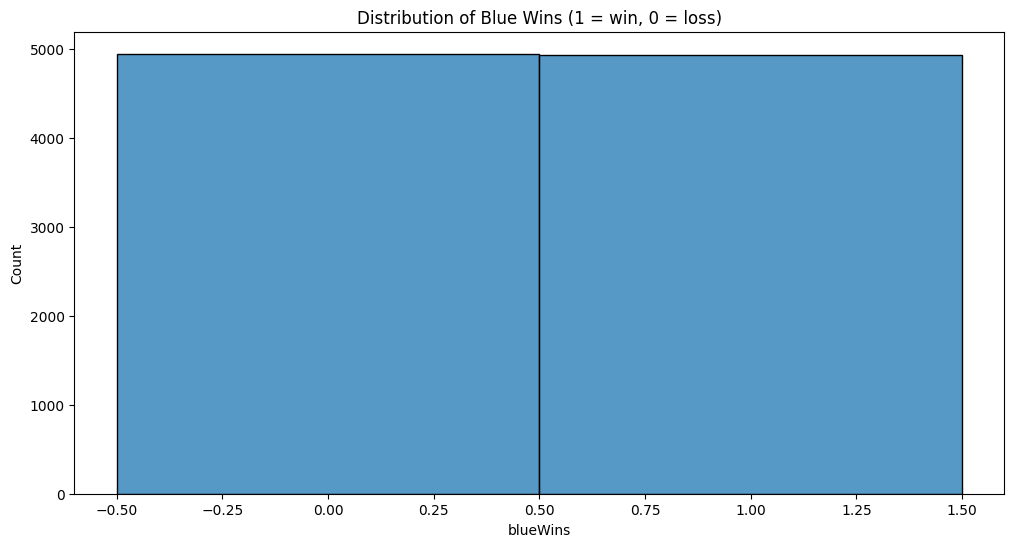

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df['blueWins'], bins=2, discrete=True)
plt.title('Distribution of Blue Wins (1 = win, 0 = loss)')
plt.show()

## Correlations

From the given plot we can derive some interesting observations:
Natural correlations:
1. blueGoldDiff, blueExperienceDiff, blueCSPerMin, blueGoldPerMin are highly positively correlated with each other. Better cs-ing (killing minions) leads to more gold and experience, and higher gold per minute. We observe the same phenomenon in terms of red team.
2. blueTotalMinionsKilled and blueTotalGold are strongly positively correlated. Obivously killing minions grants gold. Same phenomenon in terms of red team observed.
3. blueGoldDiff is strongly negatively correlated with redGoldDiff (the same goes for blueExperienceDiff and redExperienceDiff). Logicaly if blue is ahead, red is behind in gold difference.
4. Kills and Assists for both teams are positively correlated. 

Interesting correlations:
1. Deaths is slightly negatively correlated with Gold and Experience metrics. It indicates that the more deaths the team have the worse the performance. Seems logical but not obvious and certainly not always fullfiled (Thebauss tactics).
2. Taking dragons (blueDragons) and heralds (blueHeralds) show a small positive correlation with winning (blueWins). 
3. blueGoldDiff has a  positive correlation with blueWins and the same goes for blueExperienceDiff. Probably those two are gonna be the main helping indicators when it comes to our classification problem.

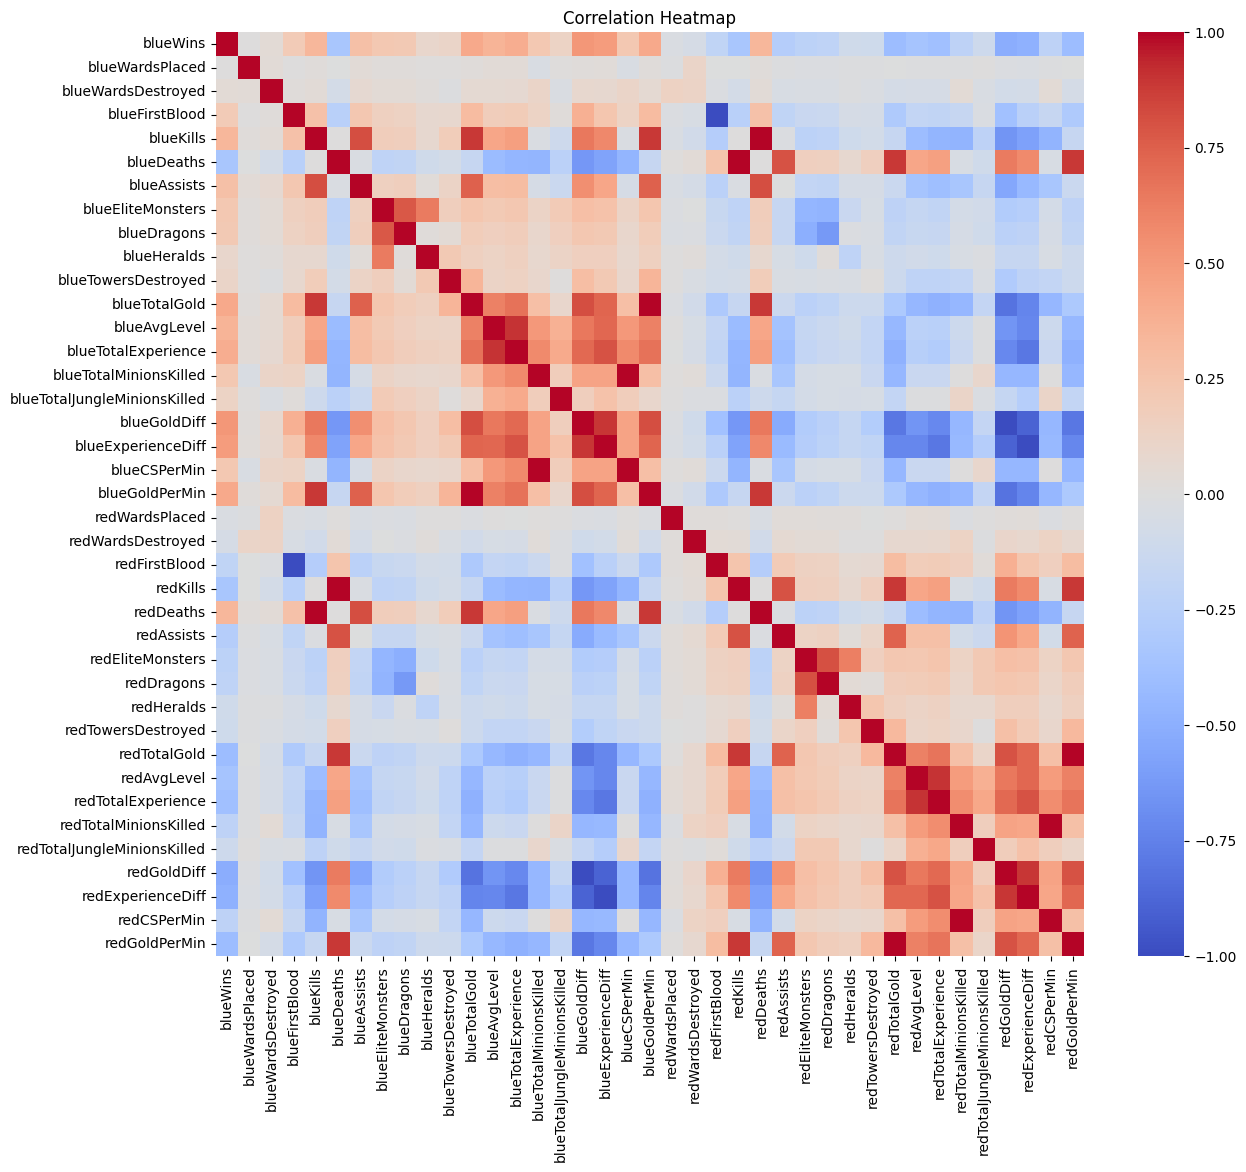

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Missing values
As we can see there is no missing values. Data is complete.

In [9]:
print("\nMissing values per column:")
print(df.isnull().sum())

# ni ma 


Missing values per column:
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds          

# Outliers
After a review, we have concluded that most outliers reflected natural variability in gameplay and did not result from data entry errors. Therefore, they were not deleted to preserve most of the data.
However, specific cases were found where outliers likely indicated irregular or trolling behavior, such as abnormally high vision scores, extremely high kills and deaths, and very low farming (minions and jungle minions killed). These outliers were removed to ensure that the dataset represents competitive gameplay.

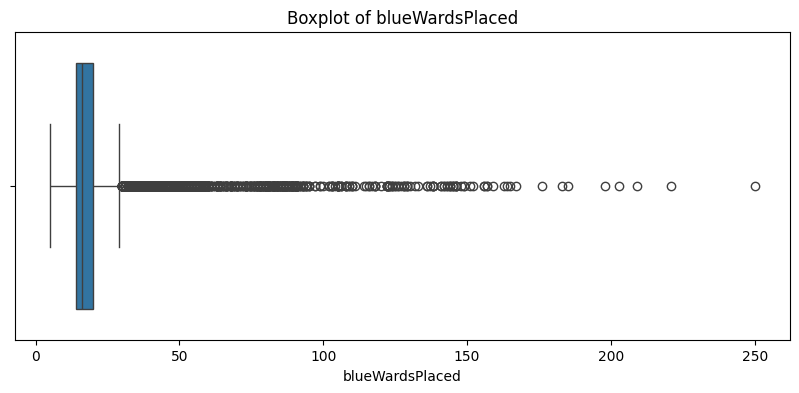

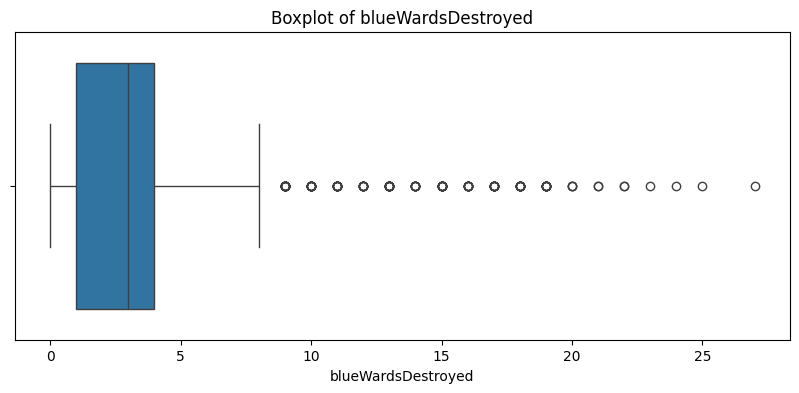

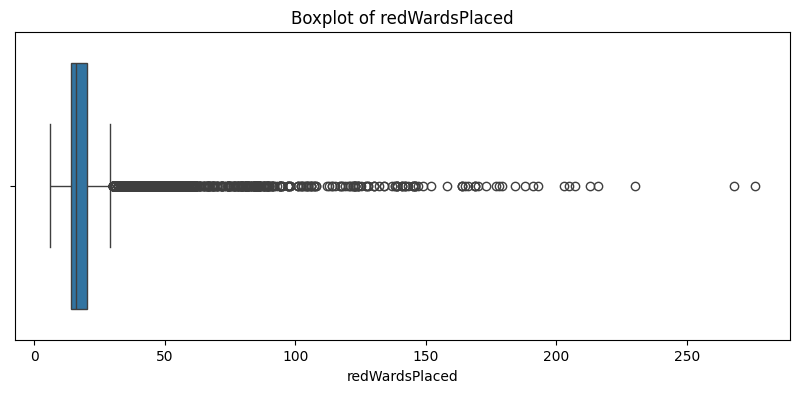

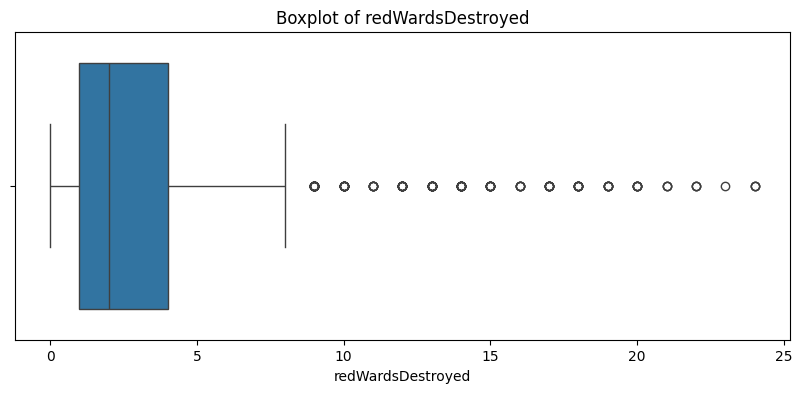

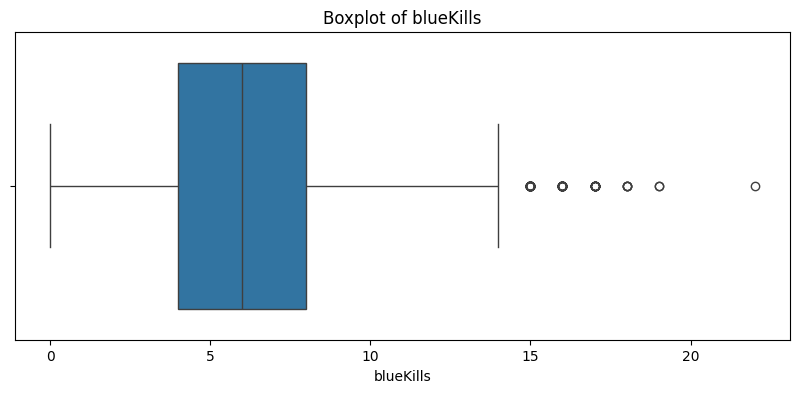

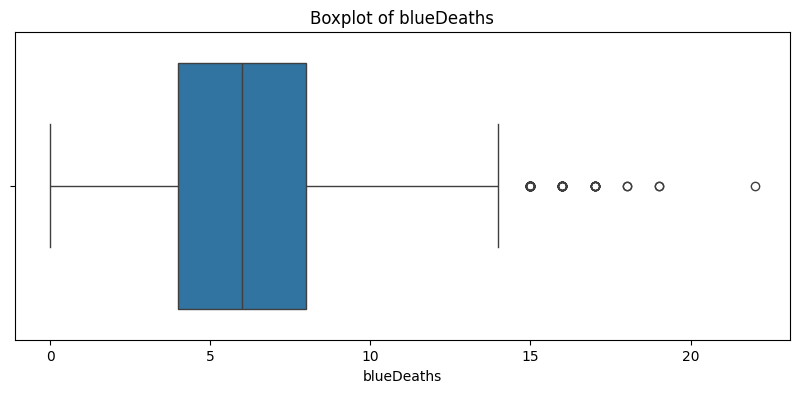

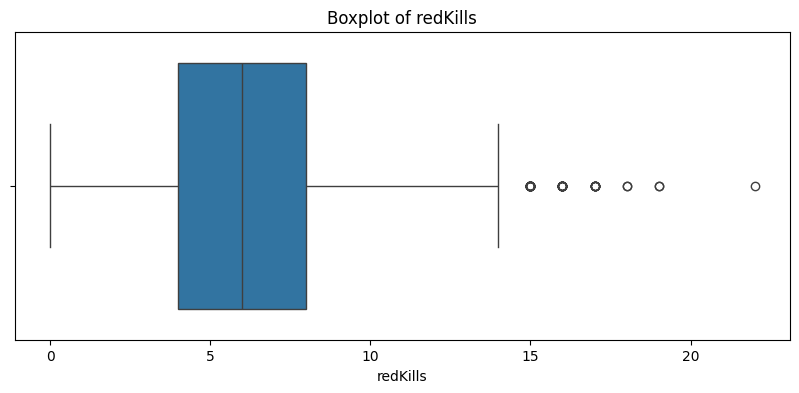

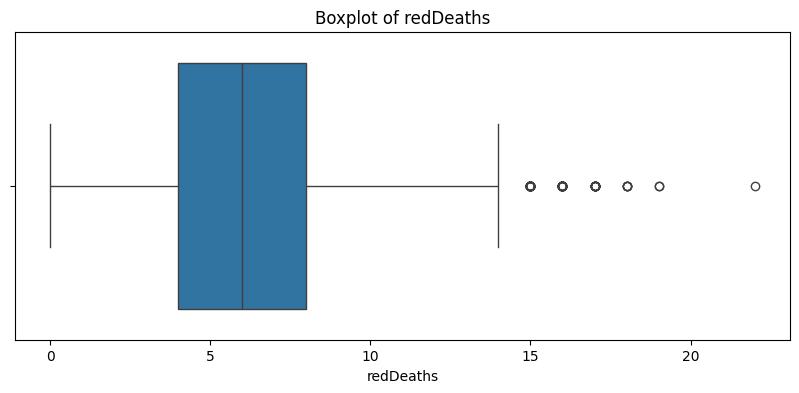

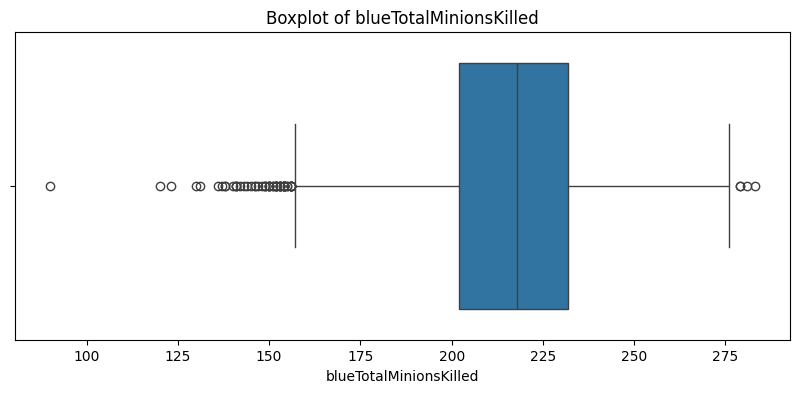

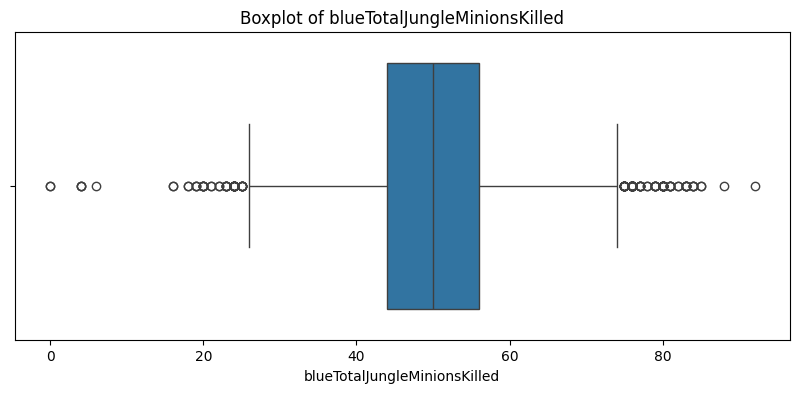

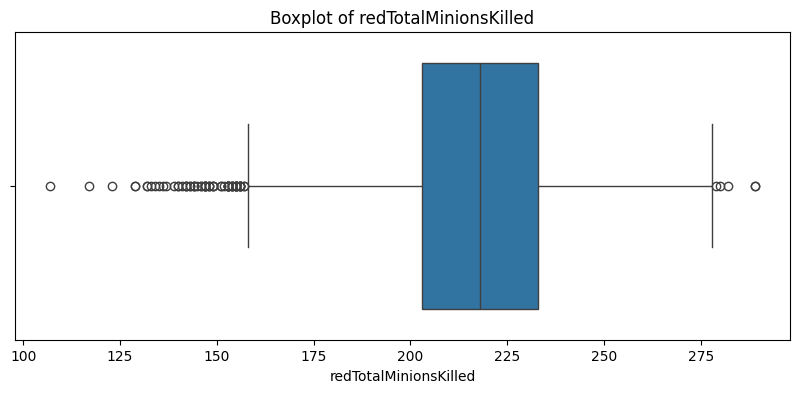

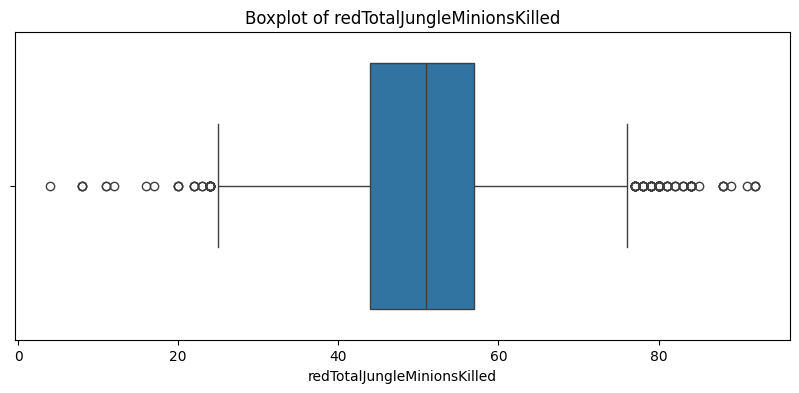

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

vision_cols = ['blueWardsPlaced', 'blueWardsDestroyed', 'redWardsPlaced', 'redWardsDestroyed']
kill_death_cols = ['blueKills', 'blueDeaths', 'redKills', 'redDeaths']
minion_cols = ['blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled','redTotalMinionsKilled', 'redTotalJungleMinionsKilled']

columns_to_plot = vision_cols + kill_death_cols + minion_cols

for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()



# Cleaning 
We will delete outliers in: 
1. high vision score (not normal competetive gameplay - f.e. 5 supports, there were results as high as 250 - it is not possible in normal gameplay) 
2. high player kills and deaths (Ruining game for purpose, f.e. because out of anger, very high kill count it hard to acquire in first 10 minutes)
3. very low minions kills (As killing the minions is base of the game, very low count would suggest that some players did not have played stared game)

All other outliers seems reasonable - not very likely, but possible to aquaire in normal gameplay.

In [11]:
df_cleaned = df.copy()

for col in vision_cols:
    df_cleaned = df_cleaned[df_cleaned[col] <= 70]

for col in kill_death_cols:
    df_cleaned = df_cleaned[df_cleaned[col] <= 20]

for col in minion_cols:
    df_cleaned = df_cleaned[df_cleaned[col] >= 10]


print(f'Original dataset shape: {df.shape}')
print(f'Cleaned dataset shape: {df_cleaned.shape}')

Original dataset shape: (9879, 39)
Cleaned dataset shape: (9282, 39)


# Columns Concatination

As some columns seems to be concerning the same thing, but from perspectives of each team we can store them in one. We assign 1 to blue team, -1 to red team, and 0 if the event did not happen.

In [12]:
# Dragon control (+1 blue, -1 red, 0 none)
def dragon_control(row):
    if row['blueDragons'] > row['redDragons']:
        return 1
    elif row['blueDragons'] < row['redDragons']:
        return -1
    else:
        return 0

# Herald control (+1 blue, -1 red, 0 none)
def herald_control(row):
    if row['blueHeralds'] > row['redHeralds']:
        return 1
    elif row['blueHeralds'] < row['redHeralds']:
        return -1
    else:
        return 0

# First blood control (+1 blue, -1 red, 0 none)
def first_blood_control(row):
    if row['blueFirstBlood'] == 1:
        return 1
    elif row['blueFirstBlood'] == 0:
        return -1
    else:
        return 0  # Should not happen, but just in case

# Creating new columns
df['DragonControl'] = df.apply(dragon_control, axis=1)
df['HeraldControl'] = df.apply(herald_control, axis=1)
df['FirstBloodControl'] = df.apply(first_blood_control, axis=1)

# Dropping the original columns
df.drop(['blueDragons', 'redDragons', 'blueHeralds', 'redHeralds', 'blueFirstBlood','redFirstBlood'], axis=1, inplace=True)

df[['DragonControl', 'HeraldControl', 'FirstBloodControl']].head()

,DragonControl,HeraldControl,FirstBloodControl
0,0,0,1
1,-1,-1,-1
2,1,0,-1
3,0,1,-1
4,-1,0,-1


Also some columns seems to be redundant. If have value of a feature for one team and difference between two teams in these feture we don't need to store value of this feature for the second team. Also per minute values are just Total values divided by 10*60, so we don't need them also.

In [13]:
# List of redundant columns to drop
redundant_cols = [
    'blueGoldPerMin', 'redGoldPerMin',
    'redGoldDiff',
    'blueCSPerMin', 'redCSPerMin',
    'redExperienceDiff',
    'redTotalGold'
]


df.drop(redundant_cols, axis=1, inplace=True)

print("Remaining columns:", df.shape[1])

Remaining columns: 29


## Now our final data looks in this way

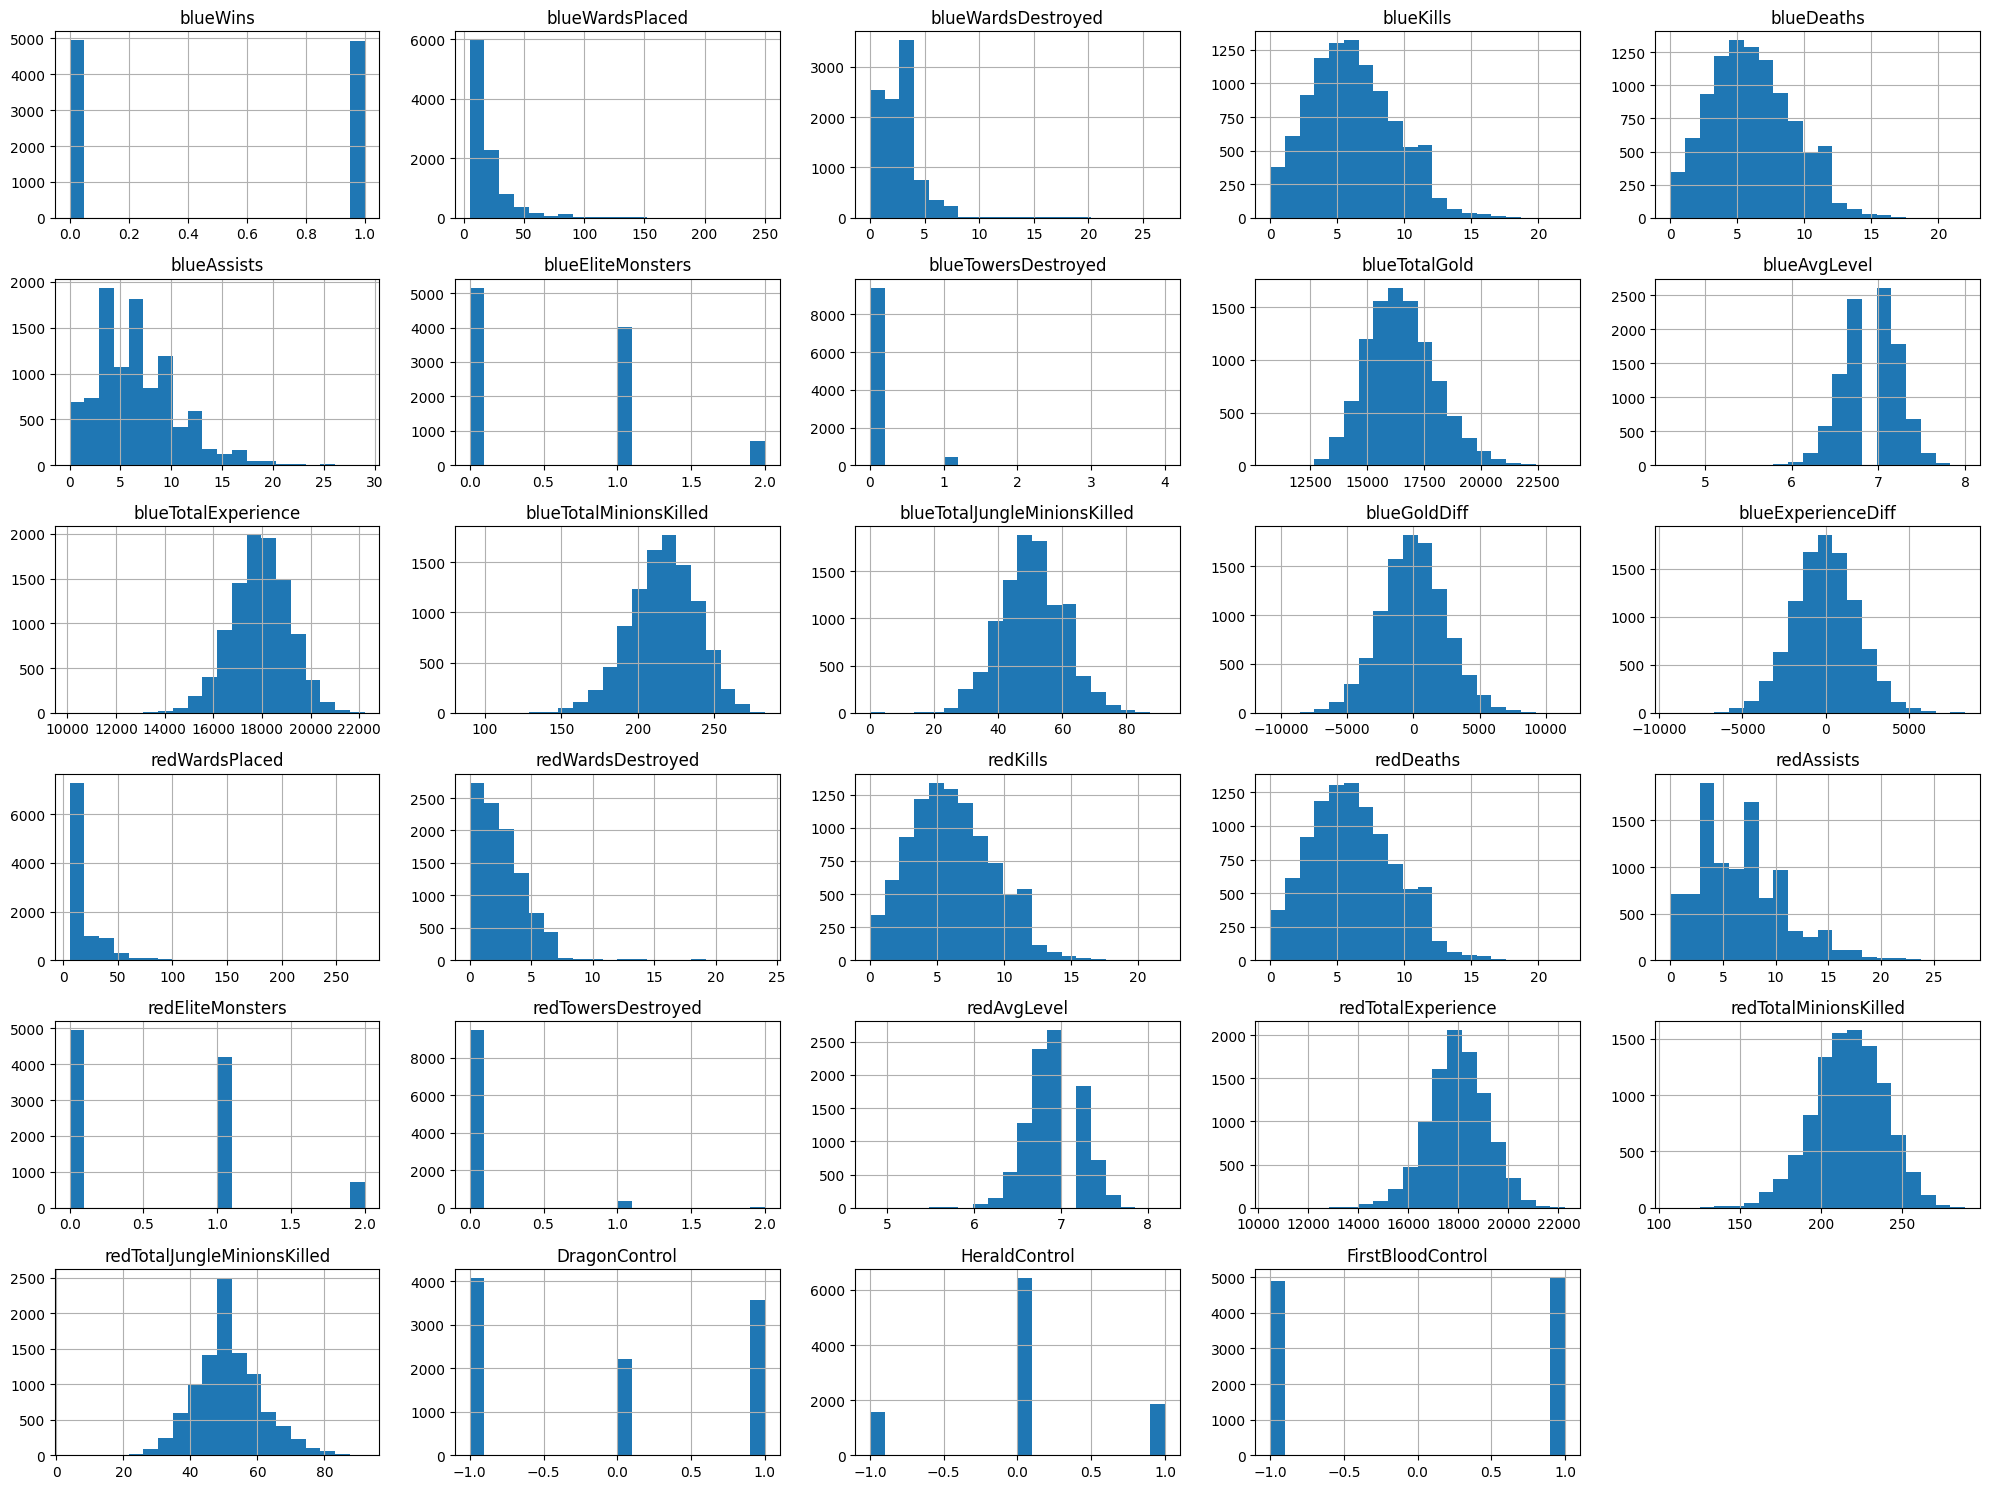

In [14]:
df.describe()

# Ploting histograms
df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

## New Correlation matrix

After changes and dropping some unimportant columns our new correlation matrix became smaller and more redable. However conclusions taken earlier from the correlations distribution do not change.

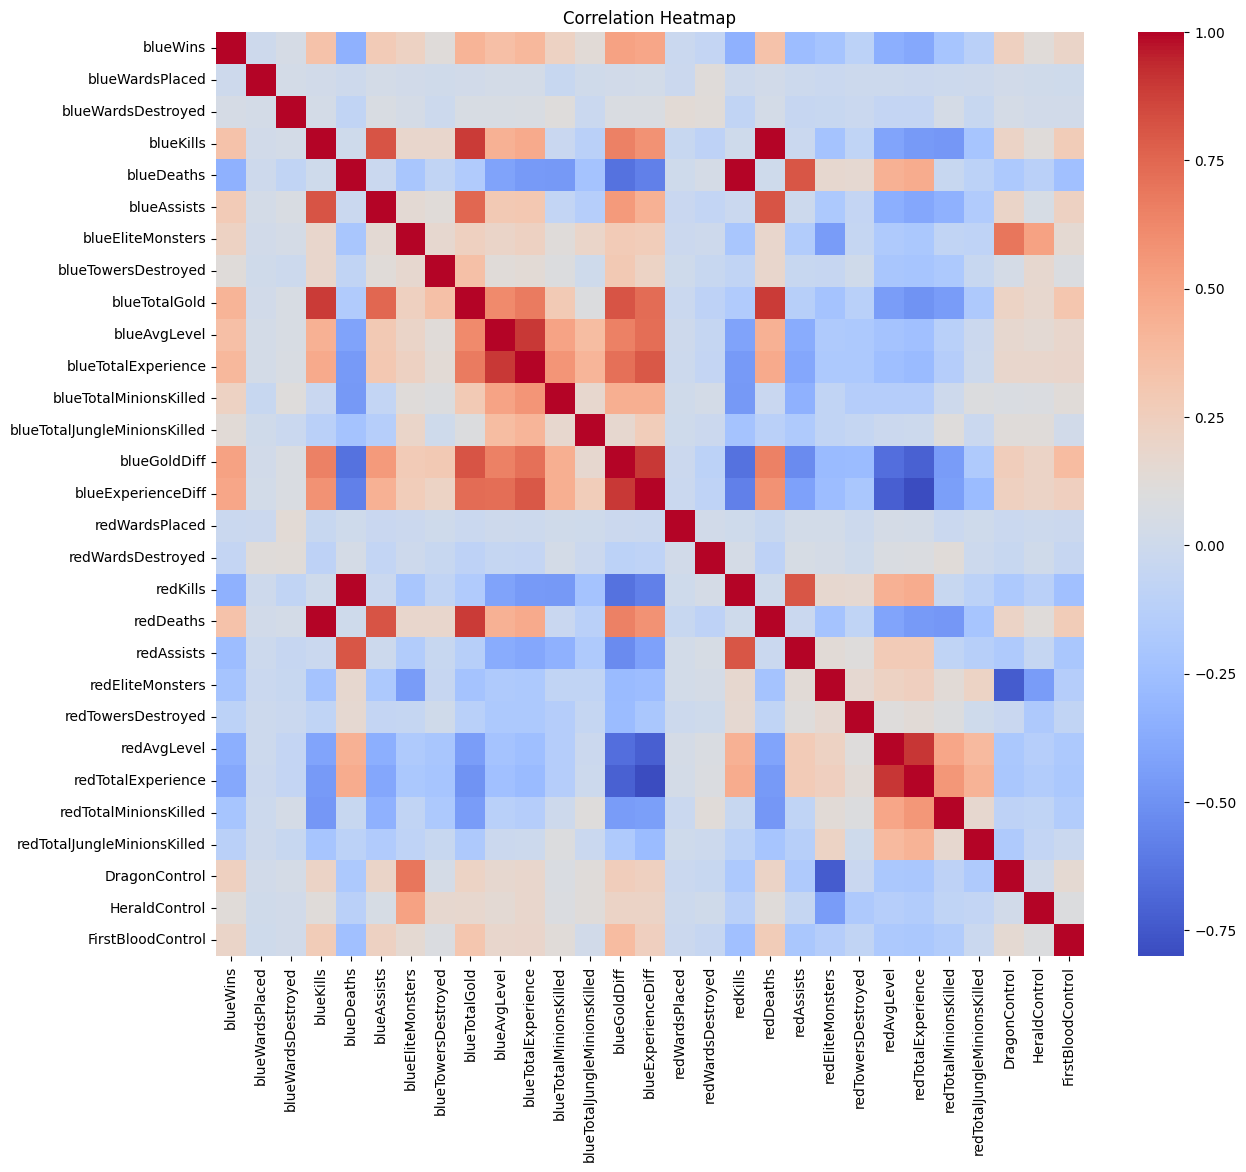

In [15]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Part Two 

Let's begin the second part of the project by preparing for the model building.

Firsly we must import libraries witch will be used to build our model. We will use sklearn as it is well built and we have some experience with using it. Also plotting libraries will be included.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Then we prepare the dataset by explicitly choosing our target value 'blue wins' from the rest of the dataset.

Also we split our data into trainig and evaluating datasets in a standard proportion of 1:4 and we use the stratification.

In [17]:
y = df['blueWins']

X = df.drop('blueWins', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=420, stratify=y )


We are ready to build the first model. We will do a Random Forest classifier. Hyperparameters are for now chosen randomly but we will take care of them later.

In [18]:
# Model initialization
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=420,
    n_jobs=-1
)

# Fitting the model
rf_model.fit(X_train, y_train)

# Prediction of our results
y_pred = rf_model.predict(X_test)


Visualizations

Accuracy: 0.7140688259109311

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71       990
           1       0.71      0.72      0.71       986

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



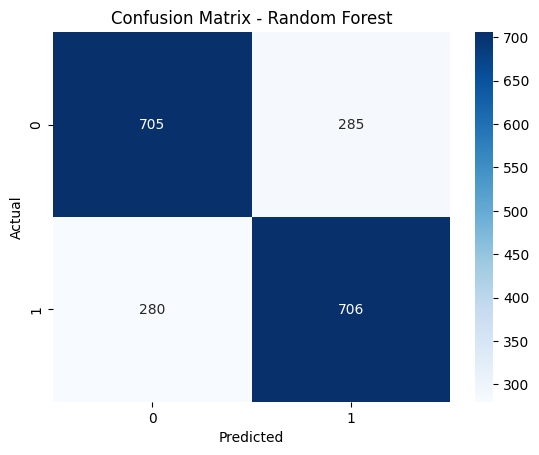

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

The accuracy of 0.714 seems to be pretty good for the begining. Let's try some hyperparameters tunning to see if we can improve it. We will use Cross Validation with Randomized Search as Grid Search would probably be too computentionally expensive for machine I am working on. 

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint

# Parameters for Randomized Search hyperparameter tuning
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 25)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# cross-validation 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest model
rf_base = RandomForestClassifier(random_state=420, n_jobs=-1)

# Randomized Search
rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try, normaly it was 100
    cv=cv_strategy,
    scoring='accuracy',
    verbose=2,
    random_state=420,
    n_jobs=-1
)

rf_search.fit(X, y)

print("Hyperparameters:")
print(rf_search.best_params_)

print("\nCross-Validated Accuracy:")
print(rf_search.best_score_)

results_df = pd.DataFrame(rf_search.cv_results_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Hyperparameters:
{'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 9, 'n_estimators': 467}

Cross-Validated Accuracy:
0.7295285706964588


Let's vizualise each of our result in terms of used hyperparametrs, so we would be able to specify ranges to tune from better. 

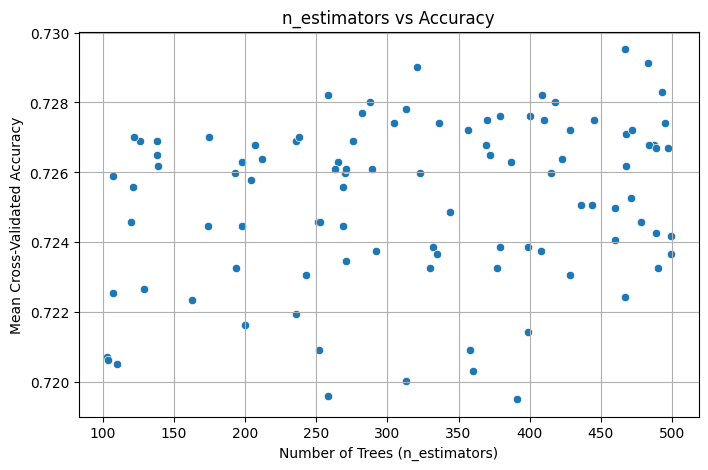

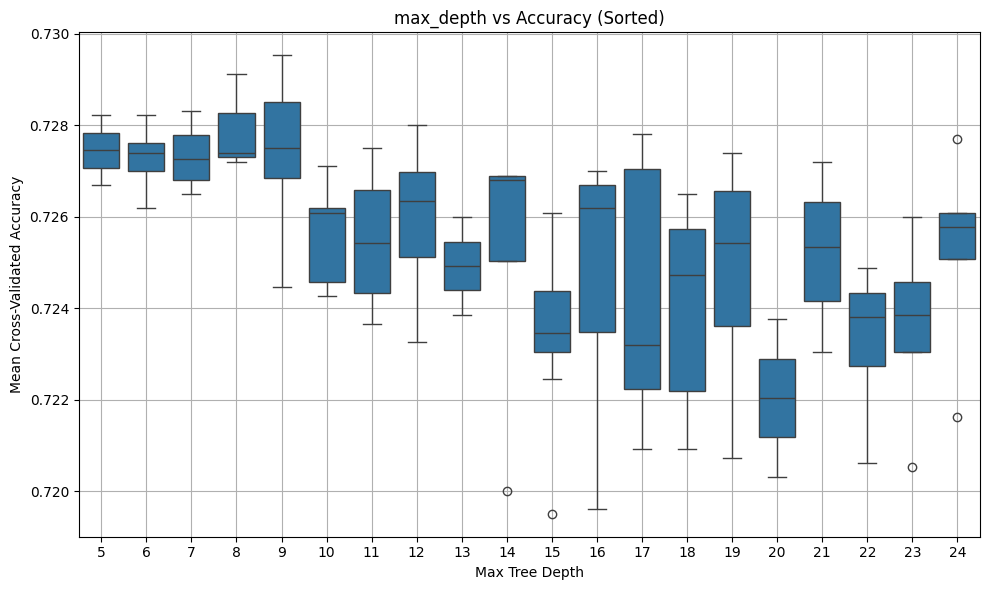

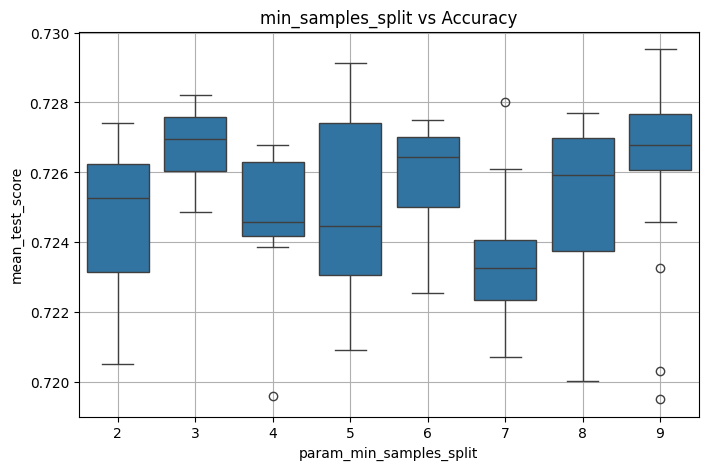

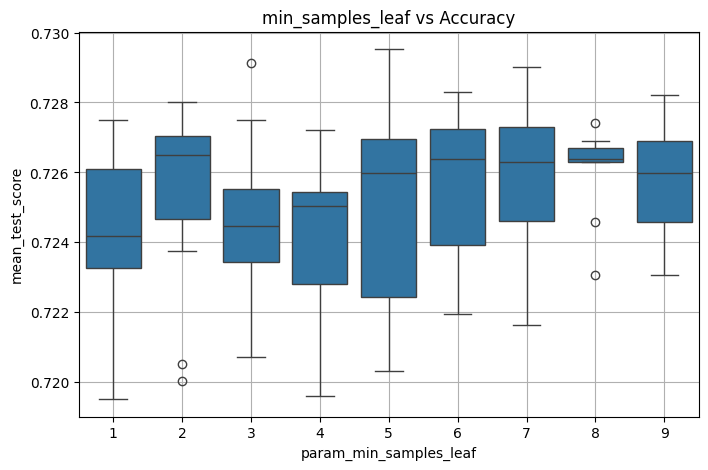

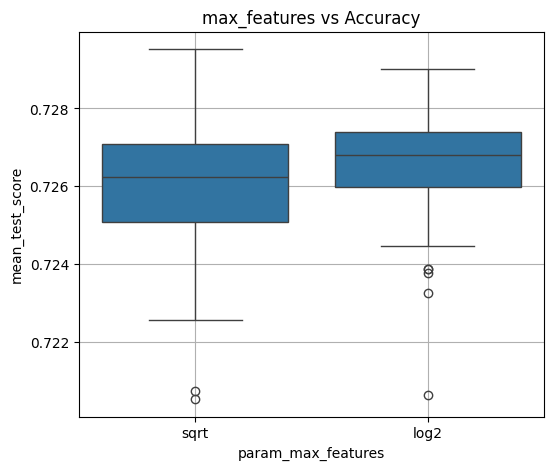

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='param_n_estimators', y='mean_test_score', data=results_df)
plt.title("n_estimators vs Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Cross-Validated Accuracy")
plt.grid(True)
plt.show()


plot_df = results_df.copy()
plot_df['max_depth_for_sorting'] = plot_df['param_max_depth'].apply(lambda x: 999 if x is None else int(x))
plot_df['max_depth_label'] = plot_df['param_max_depth'].apply(lambda x: 'None' if x is None else str(x))
plot_df = plot_df.sort_values(by='max_depth_for_sorting')
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='max_depth_label',
    y='mean_test_score',
    data=plot_df,
    order=plot_df['max_depth_label'].unique()  
)
plt.title("max_depth vs Accuracy (Sorted)")
plt.xlabel("Max Tree Depth")
plt.ylabel("Mean Cross-Validated Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='param_min_samples_split', y='mean_test_score', data=results_df)
plt.title("min_samples_split vs Accuracy")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='param_min_samples_leaf', y='mean_test_score', data=results_df)
plt.title("min_samples_leaf vs Accuracy")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(x='param_max_features', y='mean_test_score', data=results_df)
plt.title("max_features vs Accuracy")
plt.grid(True)
plt.show()




What we can deduce from the plots?

a) log2 gives significantly better accuracy than sqrt

b) It seems that higher number of min_samples leaf gives better results so we will modify our range to start from 5

c) Min_samples split seems to gives the best results for values of  3 and 4. However it does not seem that the higher number gives more accuracy consistently

d) Max_depth seems to give worse performance with the increase of it's value. We will focus on the lower intervals

e) Number of estimators dosen't seem to influce significantly our results. 

### Let's try to tune the hyperparametr's according to our findings from the previous run.

In [46]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': list(range(2, 8)),
    'min_samples_split': randint(3, 6),
    'min_samples_leaf': randint(5, 20),
    'max_features': ['log2']
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=420)
rf_base = RandomForestClassifier(random_state=420, n_jobs=-1)

rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=100,  
    cv=cv_strategy,
    scoring='accuracy',
    verbose=2,
    random_state=420,
    n_jobs=-1
)

rf_search.fit(X, y)

print("Best Hyperparameters:")
print(rf_search.best_params_)
print("\nBest Cross-Validated Accuracy:")
print(rf_search.best_score_)

results_df = pd.DataFrame(rf_search.cv_results_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:
{'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 4, 'n_estimators': 105}

Best Cross-Validated Accuracy:
0.7299328652693077


Let's try to build a model with the given hyperparameters.

In [45]:
rf_model = RandomForestClassifier(
    n_estimators=127,
    max_depth=5,
    random_state=420,
    max_features='log2',
    min_samples_split=4,
    min_samples_leaf=13,
    n_jobs=-1
)

# Fitting the model
rf_model.fit(X_train, y_train)

# Prediction of our results
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7171052631578947


Very slight improvement unfortunately. As the further tunning doesn't seem to have much sense we will try something different recording that currently our best accuracy is 71.71% achieved for the values of parameters: max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 13, 'min_samples_split': 4, 'n_estimators': 127.

# Simplified

As our dataset has a lot of features we can try to identify the unimportant ones by using Lasso (L1 regularization). To use it we need our data to be scaled for which we will use Standard Scaler.

C:\Users\tsbla\AppData\Local\Temp\ipykernel_9212\3850591437.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_features['Abs_Coefficient'] = non_zero_features['Coefficient'].abs()
C:\Users\tsbla\AppData\Local\Temp\ipykernel_9212\3850591437.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


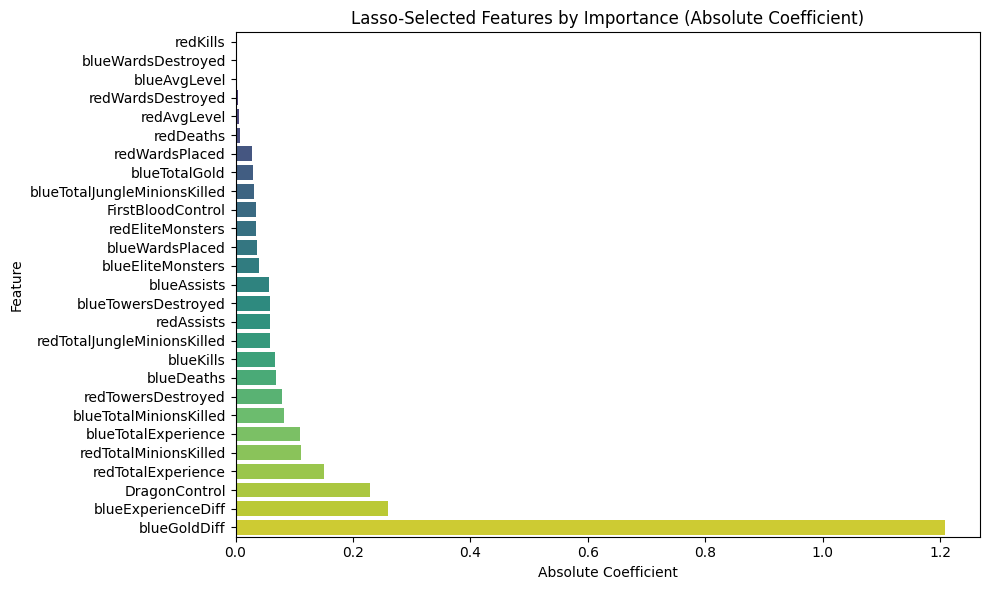

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Scalling data for Lasso
lasso_selector = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l1', solver='liblinear', random_state=420, C=1.0)
)

lasso_selector.fit(X, y)
# Getting the coefficients
coefs = lasso_selector.named_steps['logisticregression'].coef_[0]

# DataFrame of feature names and coefficients
lasso_result = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefs
})

# Sortting 
lasso_result = lasso_result.sort_values(by='Coefficient', key=abs, ascending=False)

non_zero_features = lasso_result[lasso_result['Coefficient'] != 0]
non_zero_features['Abs_Coefficient'] = non_zero_features['Coefficient'].abs()
non_zero_features = non_zero_features.sort_values(by='Abs_Coefficient', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Abs_Coefficient',
    y='Feature',
    data=non_zero_features,
    palette='viridis'
)
plt.title("Lasso-Selected Features by Importance (Absolute Coefficient)")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Lasso regularization shows that 3 features are mainly important for the outcome of the game and blueGoldDiff seems to be most valuable one. Let's try to build a model based on those three plus we will also add redTotalMinionsKilled as it's coefficient is also pretty high.

We will call this dataset as a Short1.

Accuracy on simplified model: 0.6988866396761133

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70       990
           1       0.70      0.70      0.70       986

    accuracy                           0.70      1976
   macro avg       0.70      0.70      0.70      1976
weighted avg       0.70      0.70      0.70      1976



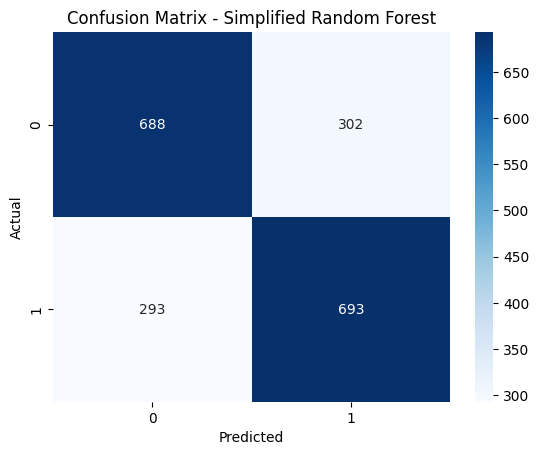

In [24]:
# Selected features from Lasso
selected_features = [
    'blueGoldDiff',
    'blueExperienceDiff',
    'DragonControl',
    'redTotalMinionsKilled'
]

# Target variable
y_short1 = df['blueWins']

# Create new dataset with only selected features
X_short1 = df[selected_features]

X_train_short1, X_test_short1, y_train_short1, y_test_short1 = train_test_split(
    X_short1, y_short1, test_size=0.2, random_state=420, stratify=y_short1
)

rf_short1 = RandomForestClassifier(n_estimators=100, random_state=420, n_jobs=-1)
rf_short1.fit(X_train_short1,  y_train_short1)

y_pred_sel = rf_short1.predict(X_test_short1)

print("Accuracy on simplified model:", accuracy_score(y_test_short1, y_pred_sel))
print("\nClassification Report:\n", classification_report(y_test_short1, y_pred_sel))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_short1, y_pred_sel)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Simplified Random Forest")
plt.show()

Accuracy of our findings for the Short1 model (69.89%) seems to be lower than the one we have with all the features included.

Let's do some tunning to improve our model.

In [47]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None] + list(range(3, 10)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(5, 10),
    'max_features': ['sqrt', 'log2', None]
}

# cross-validation 
cv_strategy_short1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=420)
rf_base = RandomForestClassifier(random_state=420, n_jobs=-1)

rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=100,  #Originaly it was 100
    cv=cv_strategy,
    scoring='accuracy',
    verbose=2,
    random_state=420,
    n_jobs=-1
)
rf_search.fit(X_train_short1, y_train_short1)

print("Best Hyperparameters:")
print(rf_search.best_params_)

print("\nBest Cross-Validated Accuracy:")
print(rf_search.best_score_)

results_df_short1 = pd.DataFrame(rf_search.cv_results_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:
{'max_depth': 4, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 288}

Best Cross-Validated Accuracy:
0.732127078679573


Let's try to build a model with the selected hyperparameters

In [55]:
rf_model_short1 = RandomForestClassifier(
    n_estimators=288,
    max_depth=4,
    random_state=420,
    max_features='log2',
    min_samples_split=2,
    min_samples_leaf=8,
    n_jobs=-1
)

# Fitting the model
rf_model_short1.fit(X_train_short1, y_train_short1)

# Prediction of our results
y_pred_short1 = rf_model_short1.predict(X_test_short1)

print("Accuracy:", accuracy_score(y_test_short1, y_pred_short1))


Accuracy: 0.7226720647773279


For {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 288}

We have accuracy of 72.27%. Interestingly the model with only 4 features is better (slightly but still) than the one built with all features. 

# Second Simplified Model 

Let's build another model, but this time we will try it by selecting the data from only thr most important columns. We will take this features from our initail model based on all data.

                         Feature  Importance
12                  blueGoldDiff    1.32e-01
13            blueExperienceDiff    1.10e-01
7                  blueTotalGold    7.30e-02
22            redTotalExperience    6.97e-02
9            blueTotalExperience    6.78e-02
10        blueTotalMinionsKilled    4.29e-02
23         redTotalMinionsKilled    4.21e-02
11  blueTotalJungleMinionsKilled    3.73e-02
24   redTotalJungleMinionsKilled    3.68e-02
0                blueWardsPlaced    3.61e-02
14                redWardsPlaced    3.41e-02
18                    redAssists    3.26e-02
3                     blueDeaths    3.13e-02
4                    blueAssists    2.97e-02
16                      redKills    2.58e-02
21                   redAvgLevel    2.53e-02
17                     redDeaths    2.45e-02
1             blueWardsDestroyed    2.44e-02
15             redWardsDestroyed    2.39e-02
8                   blueAvgLevel    2.37e-02
2                      blueKills    2.15e-02
25        

C:\Users\tsbla\AppData\Local\Temp\ipykernel_9212\1435927110.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


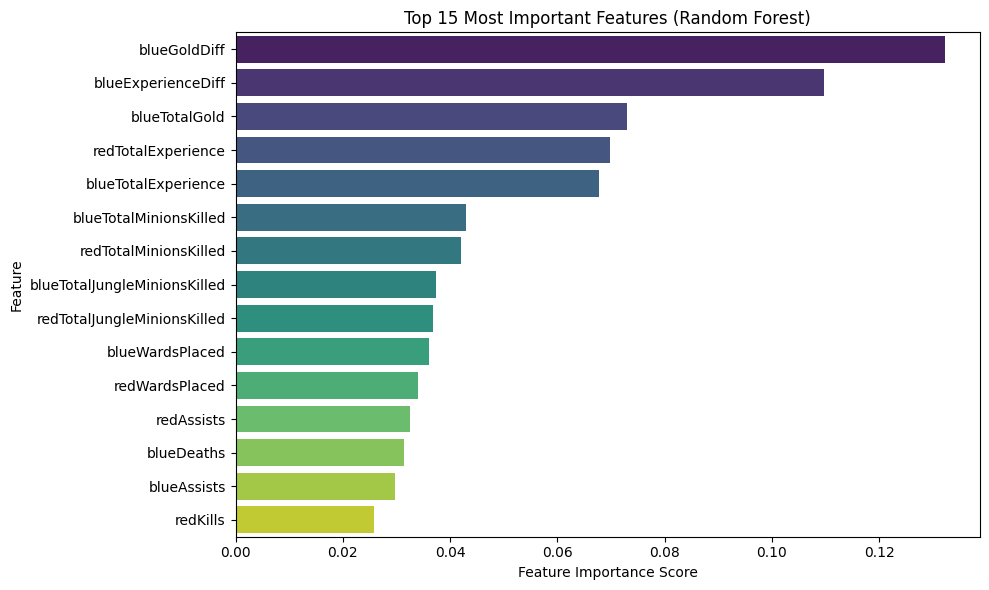

In [26]:
# Get importances
importances = rf_model.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
print(feature_importance_df)

top_n = 15

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(top_n),
    palette='viridis'
)
plt.title(f"Top {top_n} Most Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

We will select 7 leading features by it's importance score and build a model around them.

Accuracy on simplified model: 0.7171052631578947

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72       990
           1       0.72      0.72      0.72       986

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



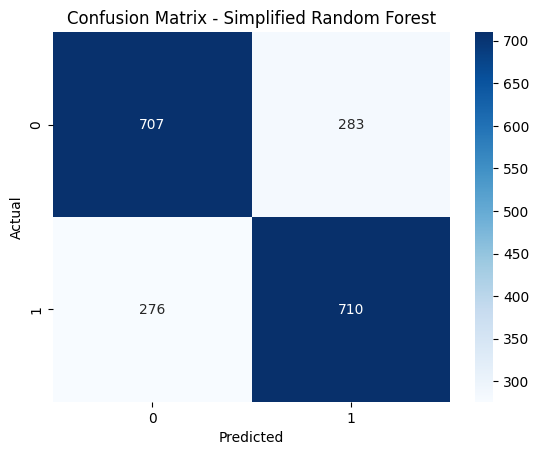

In [27]:
selected_features = [
    'blueGoldDiff',
    'blueExperienceDiff',
    'blueTotalGold',
    'redTotalExperience',
    'blueTotalExperience',
    'blueTotalMinionsKilled',
    'redTotalMinionsKilled',
]

y_short2 = df['blueWins']

# Create new dataset with only selected features
X_short2 = df[selected_features]

X_train_short2, X_test_short2, y_train_short2, y_test_short2 = train_test_split(
    X_short2, y_short2, test_size=0.2, random_state=420, stratify=y_short2
)

rf_short2 = RandomForestClassifier(n_estimators=100, random_state=420, n_jobs=-1)
rf_short2.fit(X_train_short2,  y_train_short2)

y_pred_sel = rf_short2.predict(X_test_short2)

print("Accuracy on simplified model:", accuracy_score(y_test_short2, y_pred_sel))
print("\nClassification Report:\n", classification_report(y_test_short2, y_pred_sel))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_short2, y_pred_sel)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Simplified Random Forest")
plt.show()

Some hyperparameters tunning

In [36]:
param_dist2 = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None] + list(range(3, 10)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(5, 10),
    'max_features': ['sqrt', 'log2', None]
}

# cross-validation 
cv_strategy_short2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=420)
rf_base2 = RandomForestClassifier(random_state=420, n_jobs=-1)

rf_search2 = RandomizedSearchCV(
    estimator=rf_base2,
    param_distributions=param_dist2,
    n_iter=100,  
    cv=cv_strategy_short2,
    scoring='accuracy',
    verbose=2,
    random_state=420,
    n_jobs=-1
)
rf_search2.fit(X_train_short2, y_train_short2)

print("Best Hyperparameters:")
print(rf_search2.best_params_)

print("\nBest Cross-Validated Accuracy:")
print(rf_search2.best_score_)

results_df_short2 = pd.DataFrame(rf_search2.cv_results_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:
{'max_depth': 6, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 108}

Best Cross-Validated Accuracy:
0.7268124644712928


Now let's build the last model and see it's performance

In [56]:
rf_model_short2 = RandomForestClassifier(
    n_estimators=108,
    max_depth=6,
    random_state=420,
    
    min_samples_split=9,
    min_samples_leaf=9,
    n_jobs=-1
)

# Fitting the model
rf_model_short2.fit(X_train_short2, y_train_short2)

# Prediction of our results
y_pred_short2 = rf_model_short2.predict(X_test_short2)

print("Accuracy:", accuracy_score(y_test_short2, y_pred_short2))

Accuracy: 0.7196356275303644


The set of the most optimal hyperparameters: {'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 108}

The second approach seems to not be a  successful attempt. Our 71.96% is unfortunately lower than the accuracy measured for the short1 model.


## Decison Trees summary

The best performing model seems to be the one using only 4 features:'blueGoldDiff', 'blueExperienceDiff', 'DragonControl' and 'redTotalMinionsKilled'. We have achived accuracy of 72.27%. Interestingly the model containg less data performs better, which means that most of the features are just an unimportant noise.  